In [1]:

# coding: utf-8

import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

consumer_key ="cf6yoFiRnumb8YCgAc7i2890Z"
consumer_secret = "V4cP4UqqoYjiyxV8gsK9n91Bztg4qCowhFGLcjngTYBX6BfbmO"

auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)


access_token = "3377301250-JkIbLxJp5oYnJHCJ3SVvBaOezBgTNGTSfyFGDiV"
access_token_secret = "TDaatB09DV6RjStolXxMayzAe2o836U280xwyI4Z173yj"
auth.set_access_token(access_token, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth)

#Switching to application authentication
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

#Setting up new api wrapper, using authentication only
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
 
#Error handling
if (not api):
    print ("Problem Connecting to API")
else:
    print "Autenticado"

Autenticado


In [31]:
i= 0
all_tweets = []
for tweet in tweepy.Cursor(api.search,q='*',rpp=100,lang="es",geocode="-34.5916734896,-58.3918617027,3mi").items():
    i +=1
    if i % 1000 == 0:
        print i
    all_tweets.append(tweet)
        

print len(all_tweets)

1000
2000
3000
4000
5000
6000
Rate limit reached. Sleeping for: 618


KeyboardInterrupt: 

In [40]:
places_dict = {}
loc = {}
print all_tweets[8].text

for tweet in all_tweets:
    if tweet.user.location != None:
        loc[tweet.user.location] = 1 if not loc.has_key(tweet.user.location) else loc[tweet.user.location] +1
    if tweet.place != None:
        places_dict[tweet.place.country] = 1 if not places_dict.has_key(tweet.place.name) else places_dict[tweet.place.name] + 1

print len(all_tweets)
print len(loc)

canti = 20
for w in sorted(loc, key=loc.get, reverse=True)[:canti]:
    print w, loc[w]





 RT @ESPNRedes: Así cualquiera arranca el gimnasio un lunes... https://t.co/D6jU4F9oMz
6196
1224
Buenos Aires, Argentina 1891
 1251
Buenos Aires 393
Argentina 167
Buenos Aires, Argentina. 61
Buenos Aires - Argentina 56
Ciudad Autónoma de Buenos Aire 53
buenos aires 47
Buenos Aires  45
Córdoba, Argentina 42
Buenos Aires, Argentina  39
Avellaneda, Argentina 19
Argentina, Buenos Aires 19
Santa Fe, Argentina 17
Argentina  17
Rosario, Argentina 17
Uruguay 17
Misiones, Argentina 16
BUENOS AIRES 15
Buenos Aires-Argentina 15


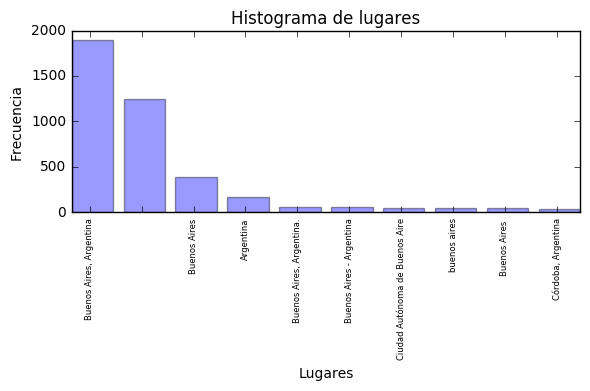

In [34]:
plt.title("Histograma de lugares")
plt.xlabel("Lugares")
plt.ylabel("Frecuencia")

index = np.arange(len(loc.keys()))
bar_width = 0.35


cant = 10
valores = sorted(loc.values(),reverse=True)
claves = sorted(loc, key=loc.get,reverse=True)

opacity = 0.4
plt.xticks(index + bar_width, claves[:cant], size=6, rotation="vertical")
plt.bar(range(cant),valores[:cant],alpha=opacity,color='b',)
plt.tight_layout()
plt.show()

In [111]:
import json
cor = []
for tweet in all_tweets:
    if tweet.user.location == u'Córdoba, Argentina':
        cor.append(tweet)

#print dir(cor[0])   
ids = []
for c in cor:
    temp_id = c.entities['user_mentions'][0]['id']
    ids.append(temp_id)
    tuser = api.get_user(temp_id)
    print tuser.location
    
print temp.location
#print  json.dumps(cor[0]._json,sort_keys=False,indent=2, separators=(',', ': '))

Buenos Aires, Argentina.
Buenos Aires
Buenos Aires, Argentina
Buenos Aires 
Buenos Aires - Argentina
Buenos Aires, Argentina
Buenos Aires
Buenos Aires, Argentina
Buenos Aires
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires 
baires 
Buenos Aires, Argentina
Buenos Aires
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires,Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
buenos aires 
Buenos Aires, Argentina
Buenos Aires
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires
Buenos Aires
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina
Buenos Aires, Argentina.


In [127]:
total = 0
for w in sorted(tusers, key=tusers.get, reverse=True):
    print w, tusers[w]
    total +=tusers[w]
print total

Buenos Aires, Argentina 482
Buenos Aires 178
Buenos Aires  28
Buenos Aires, Argentina. 19
Buenos Aires - Argentina 9
 8
Argentina, Buenos Aires 7
buenos aires 6
Buenos Aires .. 5
Buenos aires 4
Buenos Aires, Capital Federal. 4
Buenos Aires Argentina 3
Argentina - Buenos Aires 3
Buenos Aires, Argentina  3
 Buenos Aires, Argentina 3
Ciudad Buenos Aires Argentina 2
Baires 2
Cdad Autónoma de Buenos Aires 2
BUENOS AIRES 2
La Boca, Buenos Aires. 2
Buenos Aires,Argentina 2
Buenos Aires (Argentina) 1
 BAires. 1
myanmar 1
Buenos Aires, Argentina.  1
 Buenos Aires-ARGENTINA. 1
buenos aires. 1
Argentina 1
Argentina, Buenos Aires. 1
José C. Paz, Buenos Aires 1
Buenos Aires-Argentina. 1
Luján, Argentina 1
Buenos Aires City. 1
Jose C Paz, Buenos Aires 1
buenos aires,argentina 1
Buenos Aires; Argentina. 1
Buenos Aires. 1
La Boca, Buenos Aires 1
Buenos Aires City 1
 Colombia 1
Pcia. Buenos Aires 1
Barracas, Buenos Aires 1
Buenos Aires , Argentina 1
796


In [117]:
import json
cor2 = []
for tweet in all_tweets:
    if tweet.user.location == u'':
        cor2.append(tweet)
print len(cor2)
#print dir(cor[0])   
ids2 = []

tusers = {}
sinMenciones = 0
sin = 0
for c in cor2:
    if c.entities != None:
        if len(c.entities['user_mentions']) != 0:
            temp_id = c.entities['user_mentions'][0]['id']
            ids.append(temp_id)
            tuser = api.get_user(temp_id)
            tusers[tuser.location] = 1 if not tusers.has_key(tuser.location) else tusers[tuser.location] +1
        else:
            sin +=1
    else:
        sinMenciones +=1

print sinMenciones
#print  json.dumps(cor[0]._json,sort_keys=False,indent=2, separators=(',', ': '))

1251
Rate limit reached. Sleeping for: 419


KeyboardInterrupt: 